#Christopher Rodea



# STEP 1 - LOADING THE DATA AND CLEANING IT UP 

In [ ]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#Loading the dataset into a pandas dataframe
df=pd.read_csv("/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Loading this dataset shows:
#9 columns
#20640 rows that containg non null values. 
#The datatype in those rows are float numbers. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
#Get the shape of the df
#This array is 20,640 rows deep and 9 columns wide
print(df.shape)

(20640, 9)


In [ ]:
#This df has no columns with missing values. Therefor nothing needs to be removed. 
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
#1. Reloading the dataset into a dataframe
#2. Dropping the null values
#3. Getting a subset of the dataframe after it has been cleaned up to remove NA values
#4. Printing the shape of the new df after its been sanitized. 

df=pd.read_csv("/housing.csv")
df=df.dropna(subset=['Latitude', 'Longitude'])
print(df.shape)

(20640, 9)


Text(0, 0.5, 'Latitude')

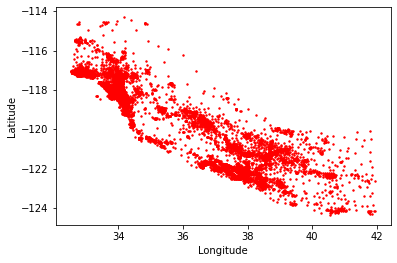

In [ ]:
# Creating a scatter plot that shows where most homes are located in town based
# off longitude and lattitude values in the dataset.

plt.scatter(df['Latitude'],df['Longitude'], c='red', s=2)
plt.xlabel("Longitude")
plt.ylabel('Latitude')

# Step 2 - Creating 2 clusters of possible billboard locations

In [ ]:

#For now, we'll try k value 2
k=2
X=np.array(list(zip(df['Latitude'], df['Longitude'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)

[1 1 1 ... 1 1 1]
[[  33.94057002 -118.00729556]
 [  37.9562441  -121.71696077]]


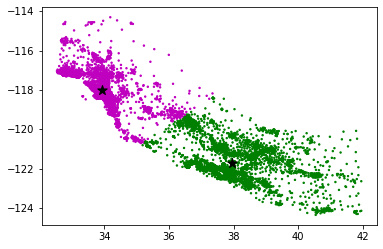

In [ ]:
#Plot the data and centroids(aka k-means) on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['Latitude'], df['Longitude'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

In [ ]:
#Using the model that you have just trained, 
#you can use it to predict what cluster for any data pt

cluster=model.predict([[35,123]])[0]
print(c[cluster])

g


In [ ]:
#To determine the silhouette coefficient/score

from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')


model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=4): {silhouette_score(X,label)}')

silhouette Score (n=2): 0.7562423686755555
silhouette Score (n=3): 0.6471818705264268
silhouette Score (n=4): 0.6018973129623912


# Step 3 - Create 4 clusters of possible billboard locations 

[[  33.06069757 -116.94067003]
 [  38.11710107 -121.93683965]
 [  34.02002333 -118.14239143]
 [  36.15785673 -119.7360312 ]]


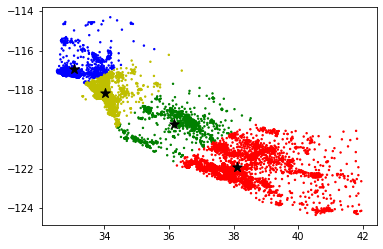

In [ ]:
k=4
X=np.array(list(zip(df['Latitude'],df['Longitude'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map the labels to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['Latitude'],df['Longitude'],c=colors,s=2)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=100,c='black')

print(centroids)